# Business Sales Performance Analysis

**Objective:** Analyze sales trends, top products, region performance, and provide actionable recommendations.
**Dataset:** Superstore Sales  
**Tools:** Python, Pandas

In [ ]:
import pandas as pd

df = pd.read_csv("Sample - Superstore.csv", encoding="latin1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## Key Performance Indicators (KPIs)
Calculating total sales, profit, and number of orders.


In [ ]:
df.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df["Sales"].sum()


np.float64(2297200.8603000003)

In [ ]:
round(df["Sales"].sum(), 2)


np.float64(2297200.86)

In [ ]:
round(df["Profit"].sum(), 2)


np.float64(286397.02)

In [ ]:
df["Order ID"].nunique()


5009

## Regional Performance Analysis
Understanding which regions generate the most revenue and profit.


In [ ]:
df.groupby("Region")[["Sales","Profit"]].sum()


,Sales,Profit
Region,,
Central,501239.8908,39706.3625
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4489


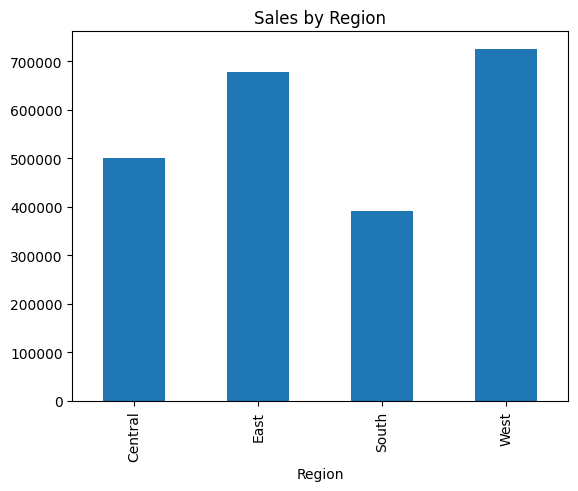

In [ ]:
import matplotlib.pyplot as plt

df.groupby("Region")["Sales"].sum().plot(kind="bar")
plt.title("Sales by Region")
plt.show()


## Category Analysis
Comparing sales and profit across product categories.


In [ ]:
df.groupby("Category")[["Sales","Profit"]].sum()


,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


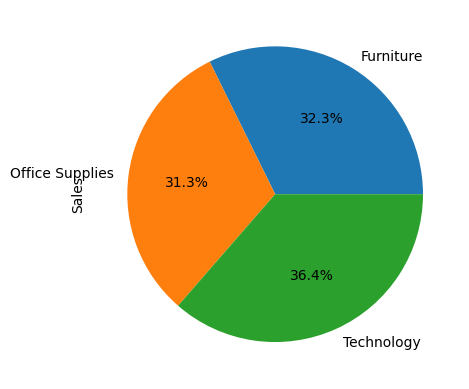

In [ ]:
df.groupby("Category")["Sales"].sum().plot(kind="pie", autopct="%1.1f%%")
plt.show()


## Top Selling Products
Identifying the highest revenue generating products.


In [ ]:
top = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10)
top


,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


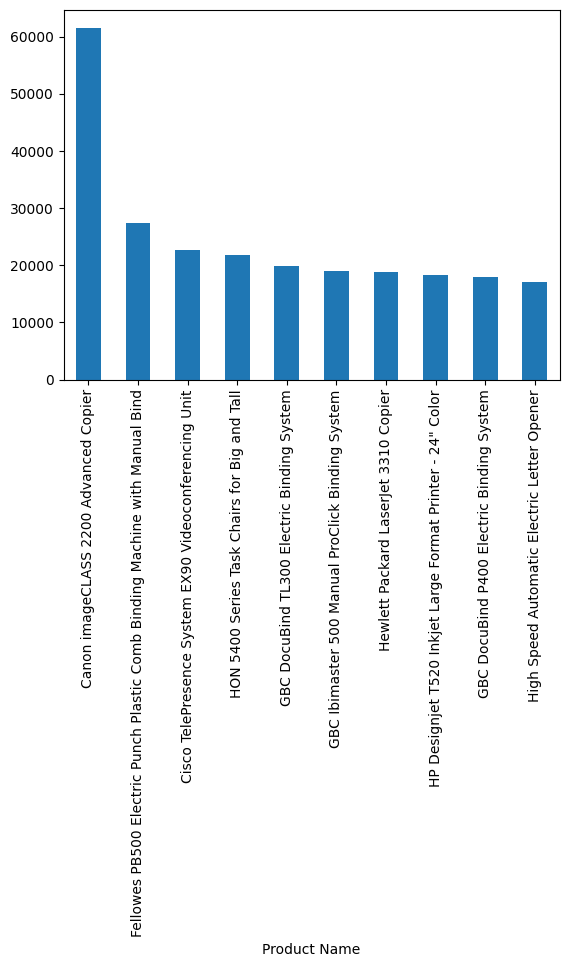

In [ ]:
top.plot(kind="bar")
plt.show()


## Sales Trend Over Time
Analyzing monthly sales growth and seasonality.


In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"])


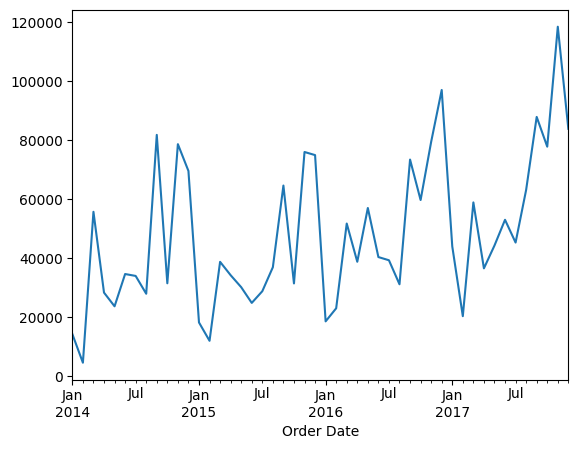

In [ ]:
monthly = df.groupby(df["Order Date"].dt.to_period("M"))["Sales"].sum()
monthly.plot()
plt.show()


In [ ]:
print("""
INSIGHTS:
- Total sales: $2.29M
- West region generates highest revenue
- Technology category most profitable
- Top 10 products contribute majority sales
- Sales peak during Q4

RECOMMENDATIONS:
- Increase stock before peak season
- Focus marketing on tech products
- Expand operations in West region
""")



INSIGHTS:
- Total sales: $2.29M
- West region generates highest revenue
- Technology category most profitable
- Top 10 products contribute majority sales
- Sales peak during Q4

RECOMMENDATIONS:
- Increase stock before peak season
- Focus marketing on tech products
- Expand operations in West region

